# First SP500 firms: market capitalization and weights 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

The market capitalization is downloaded from WRDS CRSP

In [3]:
# read the csv file
path = './market_capitalization.csv'
df = pd.read_csv(path, sep=';', index_col=False)
# rename column date
df.rename(columns={"DlyCalDt": "date"}, inplace=True)
df.head()

,date,AAPL,AMZN,AVGO,BRK.A,BRK.B,GOOG,GOOGL,JPM,LLY,...,ORCL,PEP,QCOM,TMO,TXN,VZ,WFC,WMT,PFE,SP500
0,04/01/16,5.841117e+08,300022290.0,39338997.2,159195245.0,1.632229e+08,2.557538e+08,2.221977e+08,234193490.6,91826340.99,...,150193615.0,1.438932e+08,74929400.0,55374847.50,54952303.12,1.866392e+08,2.702544e+08,1.967883e+08,1.972434e+08,1.833036e+10
1,05/01/16,5.694743e+08,298515090.0,38022904.8,159767000.0,1.638471e+08,2.560089e+08,2.228092e+08,234598414.9,93200356.47,...,149731480.8,1.448838e+08,73464300.0,55279063.98,54375880.36,1.892026e+08,2.701522e+08,2.014631e+08,1.986633e+08,1.838508e+10
2,06/01/16,5.583298e+08,297978150.0,36853352.1,160103565.0,1.639470e+08,2.563675e+08,2.221655e+08,231211775.3,92613075.66,...,150487700.4,1.449275e+08,72716800.0,54856020.10,54021936.56,1.852151e+08,2.649933e+08,2.034803e+08,1.951444e+08,1.814769e+10
3,07/01/16,5.347658e+08,286339740.0,35681034.5,158615380.0,1.616375e+08,2.504273e+08,2.168025e+08,221861705.1,90208548.57,...,147210748.8,1.421450e+08,68979300.0,53602852.38,52282555.60,1.841979e+08,2.574338e+08,2.082191e+08,1.938480e+08,1.772125e+10
4,08/01/16,5.376028e+08,285920550.0,35446018.0,157252900.0,1.602019e+08,2.463178e+08,2.138504e+08,216892179.6,90031256.25,...,145572273.0,1.416205e+08,68583125.0,53542987.68,50927456.48,1.824076e+08,2.531432e+08,2.034483e+08,1.913786e+08,1.752809e+10


In [4]:
# convert date column into datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')

In [5]:
# drop SP500 capitalization in order to compute the sum of first 50 firms
df_sp500 = df['SP500']
df.drop(columns=['SP500'], inplace=True, axis=1)

df.head()

,date,AAPL,AMZN,AVGO,BRK.A,BRK.B,GOOG,GOOGL,JPM,LLY,...,NFLX,ORCL,PEP,QCOM,TMO,TXN,VZ,WFC,WMT,PFE
0,2016-01-04,5.841117e+08,300022290.0,39338997.2,159195245.0,1.632229e+08,2.557538e+08,2.221977e+08,234193490.6,91826340.99,...,47056282.4,150193615.0,1.438932e+08,74929400.0,55374847.50,54952303.12,1.866392e+08,2.702544e+08,1.967883e+08,1.972434e+08
1,2016-01-05,5.694743e+08,298515090.0,38022904.8,159767000.0,1.638471e+08,2.560089e+08,2.228092e+08,234598414.9,93200356.47,...,46072020.4,149731480.8,1.448838e+08,73464300.0,55279063.98,54375880.36,1.892026e+08,2.701522e+08,2.014631e+08,1.986633e+08
2,2016-01-06,5.583298e+08,297978150.0,36853352.1,160103565.0,1.639470e+08,2.563675e+08,2.221655e+08,231211775.3,92613075.66,...,50359979.2,150487700.4,1.449275e+08,72716800.0,54856020.10,54021936.56,1.852151e+08,2.649933e+08,2.034803e+08,1.951444e+08
3,2016-01-07,5.347658e+08,286339740.0,35681034.5,158615380.0,1.616375e+08,2.504273e+08,2.168025e+08,221861705.1,90208548.57,...,49024806.4,147210748.8,1.421450e+08,68979300.0,53602852.38,52282555.60,1.841979e+08,2.574338e+08,2.082191e+08,1.938480e+08
4,2016-01-08,5.376028e+08,285920550.0,35446018.0,157252900.0,1.602019e+08,2.463178e+08,2.138504e+08,216892179.6,90031256.25,...,47668236.6,145572273.0,1.416205e+08,68583125.0,53542987.68,50927456.48,1.824076e+08,2.531432e+08,2.034483e+08,1.913786e+08


In [6]:
# Berkley Shire is the sum of BRK.A and BRK.B
df['BRK'] = df['BRK.A'] + df['BRK.B']
df.drop(columns= ['BRK.A', 'BRK.B'], axis = 1, inplace = True )

In [7]:
# define columns for later when the weights will be computed
columns_weight_dataframe = list(df.columns)
columns_weight_dataframe.pop(0)   # delete column date

'date'

Compute the total capitalization of the top 50 firms.

In [8]:
# compute first 
df['TOTAL_TOP_50'] = df.iloc[:, 1:].apply(lambda row: row.sum(), axis=1)
df.head()

,date,AAPL,AMZN,AVGO,GOOG,GOOGL,JPM,LLY,META,MSFT,...,PEP,QCOM,TMO,TXN,VZ,WFC,WMT,PFE,BRK,TOTAL_TOP_50
0,2016-01-04,5.841117e+08,300022290.0,39338997.2,2.557538e+08,2.221977e+08,234193490.6,91826340.99,234588766.8,434290000.0,...,1.438932e+08,74929400.0,55374847.50,54952303.12,1.866392e+08,2.702544e+08,1.967883e+08,1.972434e+08,3.224182e+08,7.583304e+09
1,2016-01-05,5.694743e+08,298515090.0,38022904.8,2.560089e+08,2.228092e+08,234598414.9,93200356.47,235759186.2,436271250.0,...,1.448838e+08,73464300.0,55279063.98,54375880.36,1.892026e+08,2.701522e+08,2.014631e+08,1.986633e+08,3.236141e+08,7.587037e+09
2,2016-01-06,5.583298e+08,297978150.0,36853352.1,2.563675e+08,2.221655e+08,231211775.3,92613075.66,236309971.8,428346250.0,...,1.449275e+08,72716800.0,54856020.10,54021936.56,1.852151e+08,2.649933e+08,2.034803e+08,1.951444e+08,3.240506e+08,7.514446e+09
3,2016-01-07,5.347658e+08,286339740.0,35681034.5,2.504273e+08,2.168025e+08,221861705.1,90208548.57,224720524.8,413447250.0,...,1.421450e+08,68979300.0,53602852.38,52282555.60,1.841979e+08,2.574338e+08,2.082191e+08,1.938480e+08,3.202529e+08,7.331069e+09
4,2016-01-08,5.376028e+08,285920550.0,35446018.0,2.463178e+08,2.138504e+08,216892179.6,90031256.25,223366510.2,414715250.0,...,1.416205e+08,68583125.0,53542987.68,50927456.48,1.824076e+08,2.531432e+08,2.034483e+08,1.913786e+08,3.174548e+08,7.251961e+09


In [9]:
df['SP500'] = df_sp500
df.head()

,date,AAPL,AMZN,AVGO,GOOG,GOOGL,JPM,LLY,META,MSFT,...,QCOM,TMO,TXN,VZ,WFC,WMT,PFE,BRK,TOTAL_TOP_50,SP500
0,2016-01-04,5.841117e+08,300022290.0,39338997.2,2.557538e+08,2.221977e+08,234193490.6,91826340.99,234588766.8,434290000.0,...,74929400.0,55374847.50,54952303.12,1.866392e+08,2.702544e+08,1.967883e+08,1.972434e+08,3.224182e+08,7.583304e+09,1.833036e+10
1,2016-01-05,5.694743e+08,298515090.0,38022904.8,2.560089e+08,2.228092e+08,234598414.9,93200356.47,235759186.2,436271250.0,...,73464300.0,55279063.98,54375880.36,1.892026e+08,2.701522e+08,2.014631e+08,1.986633e+08,3.236141e+08,7.587037e+09,1.838508e+10
2,2016-01-06,5.583298e+08,297978150.0,36853352.1,2.563675e+08,2.221655e+08,231211775.3,92613075.66,236309971.8,428346250.0,...,72716800.0,54856020.10,54021936.56,1.852151e+08,2.649933e+08,2.034803e+08,1.951444e+08,3.240506e+08,7.514446e+09,1.814769e+10
3,2016-01-07,5.347658e+08,286339740.0,35681034.5,2.504273e+08,2.168025e+08,221861705.1,90208548.57,224720524.8,413447250.0,...,68979300.0,53602852.38,52282555.60,1.841979e+08,2.574338e+08,2.082191e+08,1.938480e+08,3.202529e+08,7.331069e+09,1.772125e+10
4,2016-01-08,5.376028e+08,285920550.0,35446018.0,2.463178e+08,2.138504e+08,216892179.6,90031256.25,223366510.2,414715250.0,...,68583125.0,53542987.68,50927456.48,1.824076e+08,2.531432e+08,2.034483e+08,1.913786e+08,3.174548e+08,7.251961e+09,1.752809e+10


Compute the daily ratio between top 50 firms' capitalization and the SP500 one.

In [10]:
# compute the ratio to observe the weight the first 50 firms have in the SP500
df['Ratio'] = df['TOTAL_TOP_50'] / df['SP500']
df.head()

,date,AAPL,AMZN,AVGO,GOOG,GOOGL,JPM,LLY,META,MSFT,...,TMO,TXN,VZ,WFC,WMT,PFE,BRK,TOTAL_TOP_50,SP500,Ratio
0,2016-01-04,5.841117e+08,300022290.0,39338997.2,2.557538e+08,2.221977e+08,234193490.6,91826340.99,234588766.8,434290000.0,...,55374847.50,54952303.12,1.866392e+08,2.702544e+08,1.967883e+08,1.972434e+08,3.224182e+08,7.583304e+09,1.833036e+10,0.413702
1,2016-01-05,5.694743e+08,298515090.0,38022904.8,2.560089e+08,2.228092e+08,234598414.9,93200356.47,235759186.2,436271250.0,...,55279063.98,54375880.36,1.892026e+08,2.701522e+08,2.014631e+08,1.986633e+08,3.236141e+08,7.587037e+09,1.838508e+10,0.412674
2,2016-01-06,5.583298e+08,297978150.0,36853352.1,2.563675e+08,2.221655e+08,231211775.3,92613075.66,236309971.8,428346250.0,...,54856020.10,54021936.56,1.852151e+08,2.649933e+08,2.034803e+08,1.951444e+08,3.240506e+08,7.514446e+09,1.814769e+10,0.414072
3,2016-01-07,5.347658e+08,286339740.0,35681034.5,2.504273e+08,2.168025e+08,221861705.1,90208548.57,224720524.8,413447250.0,...,53602852.38,52282555.60,1.841979e+08,2.574338e+08,2.082191e+08,1.938480e+08,3.202529e+08,7.331069e+09,1.772125e+10,0.413688
4,2016-01-08,5.376028e+08,285920550.0,35446018.0,2.463178e+08,2.138504e+08,216892179.6,90031256.25,223366510.2,414715250.0,...,53542987.68,50927456.48,1.824076e+08,2.531432e+08,2.034483e+08,1.913786e+08,3.174548e+08,7.251961e+09,1.752809e+10,0.413734


PLOTS

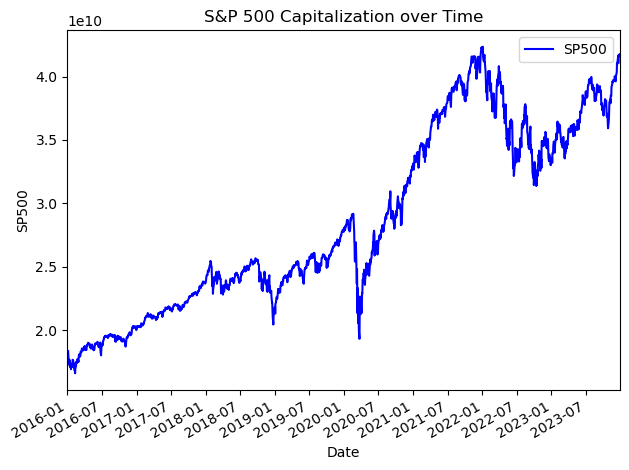

In [11]:
# Create a Figure and an Axes object
fig, ax = plt.subplots()

# Plot using datetime data for x-axis
ax.plot_date(df['date'], df['SP500'], '-', color='blue', label='SP500')

# Set datetime format for x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set datetime ticks using `MonthLocator`
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# Set x-axis limits to start from January 2016
ax.set_xlim(pd.Timestamp('2016-01-01'), df['date'].max())

# Auto-format the date labels
fig.autofmt_xdate()

# Add a legend
ax.legend()

# Labeling and titling
ax.set_xlabel('Date')
ax.set_ylabel('SP500')
ax.set_title('S&P 500 Capitalization over Time')

# Display the plot
plt.tight_layout()
plt.show()

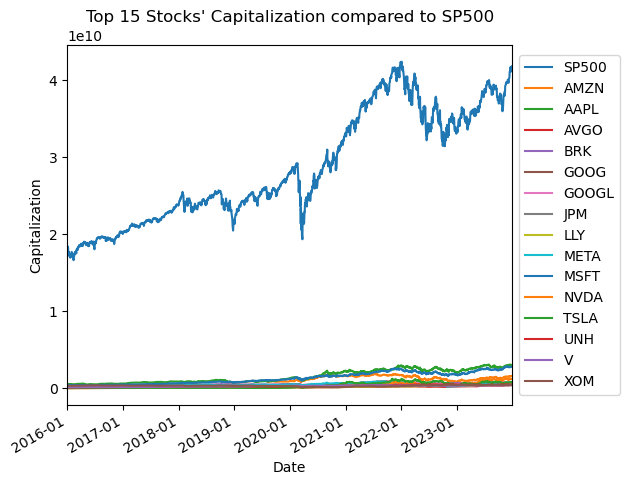

In [12]:
# List of columns to plot
stocks_and_sp500 = ['SP500', 'AMZN', 'AAPL', 'AVGO', 'BRK', 'GOOG', 'GOOGL', 'JPM', 'LLY', 'META', 'MSFT', 'NVDA', 'TSLA', 'UNH', 'V', 'XOM']

# Create a Figure and an Axes object
fig, ax = plt.subplots()

# Plot each column using datetime data for x-axis
for column in stocks_and_sp500:
    ax.plot_date(df['date'], df[column], '-', label=column)

# Set datetime format for x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set datetime ticks using `MonthLocator`
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))

# Set x-axis limits to start from January 2016
ax.set_xlim(pd.Timestamp('2016-01-01'), df['date'].max())

# Auto-format the date labels
fig.autofmt_xdate()

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Labeling and titling
ax.set_xlabel('Date')
ax.set_ylabel('Capitalization')
ax.set_title('Top 15 Stocks\' Capitalization compared to SP500')

# Display the plot
plt.tight_layout()
plt.show()


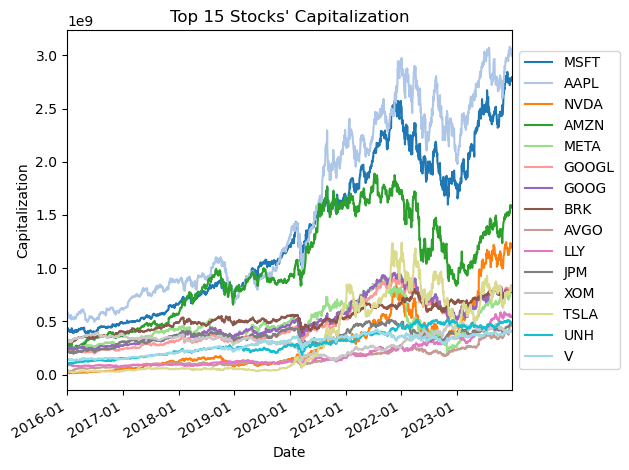

In [13]:
# plot first 15 stocks based on their weight in the SP500
only_stocks = ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'META', 'GOOGL', 'GOOG', 'BRK', 'AVGO', 'LLY',
               'JPM', 'XOM', 'TSLA', 'UNH', 'V']

# Create a Figure and an Axes object
fig, ax = plt.subplots()

# Define a color palette
colors = plt.cm.tab20(np.linspace(0, 1, len(only_stocks)))

# Plot each column using datetime data for x-axis and different colors
for i, column in enumerate(only_stocks):
    ax.plot_date(df['date'], df[column], '-', label=column, color=colors[i])

# Set datetime format for x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set datetime ticks using `MonthLocator`
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))

# Set x-axis limits to start from January 2016
ax.set_xlim(pd.Timestamp('2016-01-01'), df['date'].max())

# Auto-format the date labels
fig.autofmt_xdate()

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Labeling and titling
ax.set_xlabel('Date')
ax.set_ylabel('Capitalization')
ax.set_title('Top 15 Stocks\' Capitalization')

# Display the plot
plt.tight_layout()
plt.show()

Compute the mean of all ratios. 

The value we find is ~0.491, which indicates that the top 50 firms address for almost half of all the total market cap.

In [14]:
# mean of all Ratios
df.loc[:, 'Ratio'].mean()

0.4907722792380407

In [15]:
# create pandas dataframe where all weights will be stored
weights_temporary = pd.DataFrame(columns=columns_weight_dataframe)

In [16]:
# daily relative weight of single firm in the top50 basket
for stock in columns_weight_dataframe:
    weights_temporary[stock] = df[stock] / df['TOTAL_TOP_50']

Compute the mean of the daily relative weights for the entire period for each firm

In [17]:
means = weights_temporary.mean()
weights = pd.DataFrame(means, columns=['weight'])
weights.head()

,weight
AAPL,0.100563
AMZN,0.067343
AVGO,0.010287
GOOG,0.035115
GOOGL,0.031910


In [25]:
# sort the dataframe based on the weights
weights.sort_values(by='weight', ascending=False, inplace=True)

In [26]:
weights.to_csv('weights_sp500.csv')

Plot of the weights

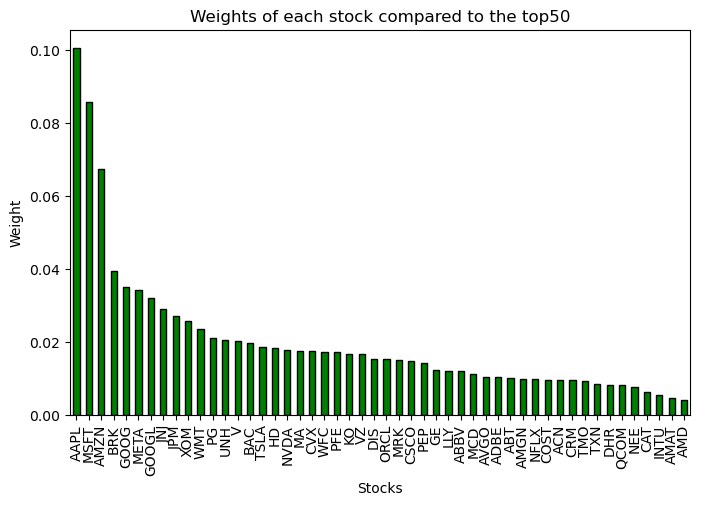

In [28]:
plot_weights = weights['weight'].plot(kind = 'bar',
                     title = 'Weights of each stock compared to the top50',
                      alpha = 1, 
                      rot = 90,
                      color='green',
                      edgecolor='black',
                     figsize = (8, 5))
plot_weights.set_xlabel('Stocks')
plot_weights.set_ylabel('Weight')
plt.show()